# 01 Getting Acquainted

## The problem

Hoje um dos desafios do Sicredi é trabalhar com a retenção do associado propenso a deixar de utilizar os produtos da Instituição Financeira. Com isso, no intuito de entender o teu pensamento analítico, as técnicas que costuma utilizar e sua habilidade de apresentar conteúdos complexos de forma não técnica, desenvolvemos este case que consiste em:

Predição de um associado cancelar seu cartão de crédito - chamamos de evento de churn - utilizando dados de três bases: cadastral do associado, transacional do cartão e de atendimentos abertos pelo associado.
O case deve ser realizado da seguinte forma:

Desenvolvimento e envio de código para a solução e
Desenvolvimento, envio e realização de uma apresentação de 30 minutos para mostrar os resultados obtidos, bem como possíveis melhorias nos dados e sugestões de ações (se houver).
O desenvolvimento da solução é livre: podem ser usadas quaisquer técnicas (preferencialmente utilizando python) e dados complementares também podem ser incorporados na análise.


## Imports

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_dark"
pio.renderers.default = "png"

## Load Data

### Basic Account Data

In [2]:
account_df = pd.read_csv(
    '../data/cadastro.csv', 
    sep=';', 
    date_format='%d/%m/%Y', 
    parse_dates=['associado_desde'],
    dtype={
        "id_associado": str,
    }
    )


account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_associado       1100 non-null   object        
 1   idade              1100 non-null   int64         
 2   profissao          1100 non-null   object        
 3   sexo               1100 non-null   object        
 4   regiao_residencia  1100 non-null   object        
 5   risco              1100 non-null   object        
 6   associado_desde    1100 non-null   datetime64[ns]
 7   churn              1100 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 68.9+ KB


In [3]:
account_df.head()

,id_associado,idade,profissao,sexo,regiao_residencia,risco,associado_desde,churn
0,99951605,38,Garimpeiro,M,Sul,Médio,2021-03-01,0
1,99950635,42,Tabelião de protestos,M,Sul,Baixo,2021-03-03,0
2,99767389,36,Praça da marinha,F,Sul,Médio,2021-03-04,0
3,81483776,39,Artesão crocheteiro,F,Centro-Oeste,Baixo,2021-03-06,0
4,99769395,34,Trabalhador da cultura de milho e sorgo,F,Sudeste,Baixo,2021-03-06,0


In [4]:
print(f"The dataset has {account_df.shape[0]} rows and {account_df.id_associado.nunique()} unique accounts.")

The dataset has 1100 rows and 1067 unique accounts.


In [5]:
account_df.loc[account_df.duplicated(subset='id_associado', keep=False)].sort_values('id_associado')

,id_associado,idade,profissao,sexo,regiao_residencia,risco,associado_desde,churn
180,81482209,40,Poceiro (edificações),F,Centro-Oeste,Baixo,2021-07-29,0
111,81482209,31,Supervisor de telemarketing e atendimento,M,Sudeste,Baixo,2021-06-01,0
314,81482735,27,Professor de língua espanhola,F,Norte,Médio,2021-10-29,0
584,81482735,36,Supervisor de recepcionistas,F,Nordeste,Médio,2022-07-07,0
517,81483358,43,Sócioeducador,F,Sul,Médio,2022-04-30,0
...,...,...,...,...,...,...,...,...
565,99952369,30,Engenheiro civil,F,Sudeste,Baixo,2022-06-18,0
231,99952511,32,Corretor de seguros,F,Sudeste,Baixo,2021-08-30,0
431,99952511,38,Fotógrafo retratista,M,Sudeste,Baixo,2022-02-15,0
739,99952599,34,Engenheiro civil (hidráulica),M,Nordeste,Baixo,2022-12-09,1


Given that this is a churn prediction problem, I think it would be wise to discard all the duplicated id rows. Why? This can be due to a mistake in the data collection process, or it can be due to the fact that the same person has more than one account. Could it be that these duplicated ids are referred to a PJ? This could explain why the region os residency is different in some of them, but the sex would be a bit strange of an information in this case. Another credible reason is some kind of fraud. In any case, with the current data I can't for sure. There are no temporal data that justify repeated rows or any other kind of data that could help me to understand why this is happening. So, maybe it's better to discard them.

In [6]:
account_df = account_df.drop_duplicates(subset='id_associado', keep=False)

In [7]:
# Set a new index
account_df = account_df.set_index('id_associado')

#### idade

Age seems like a normal distribution, with a peak around 34 years old. 

In [8]:
account_df.idade.describe()

count    1034.00000
mean       35.23501
std         5.17645
min        21.00000
25%        32.00000
50%        35.00000
75%        38.00000
max        55.00000
Name: idade, dtype: float64

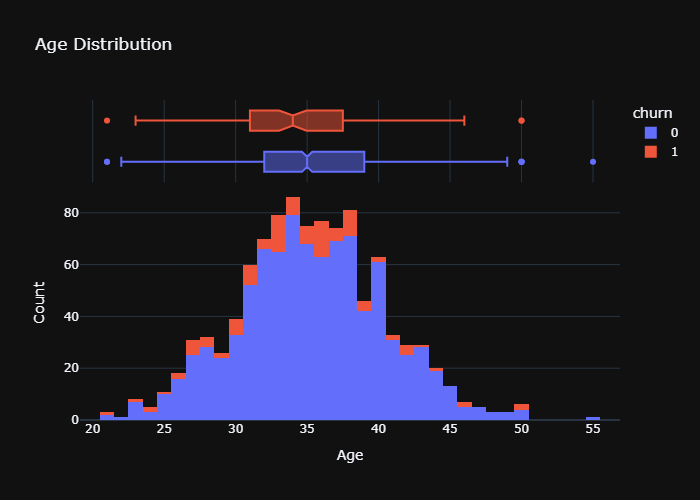

In [9]:
fig = px.histogram(account_df, x="idade", title="Age Distribution", marginal="box", color="churn", barmode="stack",)
fig.update_layout(hovermode="x unified", xaxis_title="Age", yaxis_title="Count")
fig.show()

When looking at a distribution of probabilities, people with 31-37 years old are the most likely to churn.

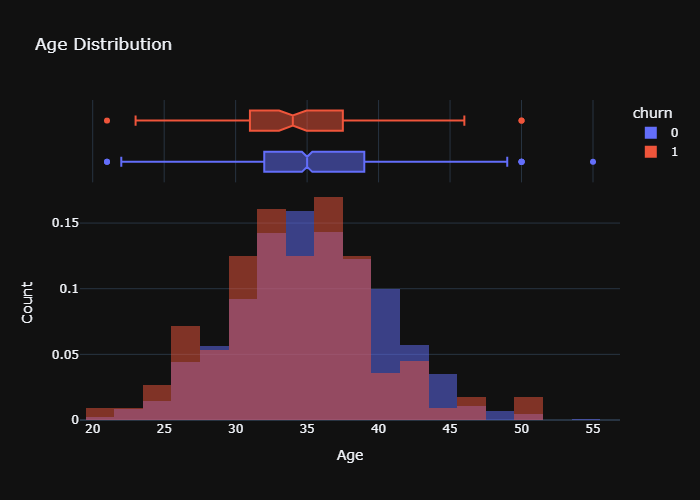

In [10]:
fig = px.histogram(account_df, x="idade", title="Age Distribution", marginal="box", color="churn", barmode="overlay", histnorm="probability", nbins=20)
fig.update_layout(hovermode="x unified", xaxis_title="Age", yaxis_title="Count")
fig.show()

#### profissao

This information won't be useful. It has way too many categories and it ends up being overly specific. 

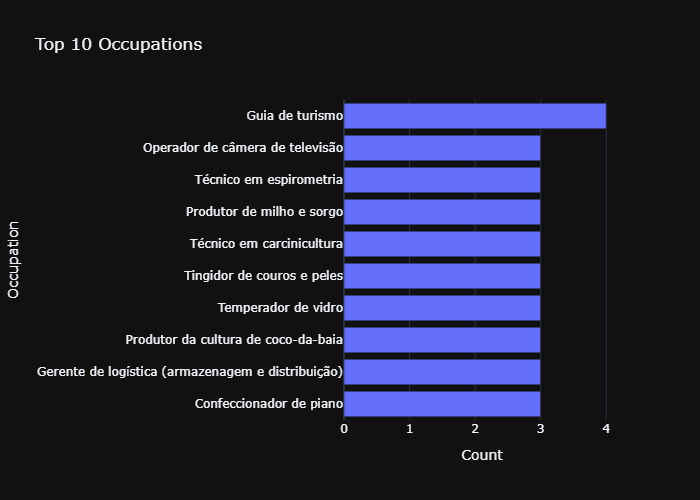

In [11]:
top_10_occupations = account_df.profissao.value_counts().head(10).sort_values(ascending=True)
fig = px.bar(top_10_occupations, x=top_10_occupations.values, y=top_10_occupations.index, orientation='h', title="Top 10 Occupations")
fig.update_yaxes(title_text='Occupation')
fig.update_xaxes(title_text='Count')
fig.show()

The most common profession has only 4 associates. By the ECDF below, more than 83% of the associates have a profession that is unique to them. If I were to use this information, I would have to group them in a more general way and this would be a hard task for just a case. A more usable piece of information would be the income, which is a continuous variable and can be used in a more straightforward way. This would be my first suggestion about the data.

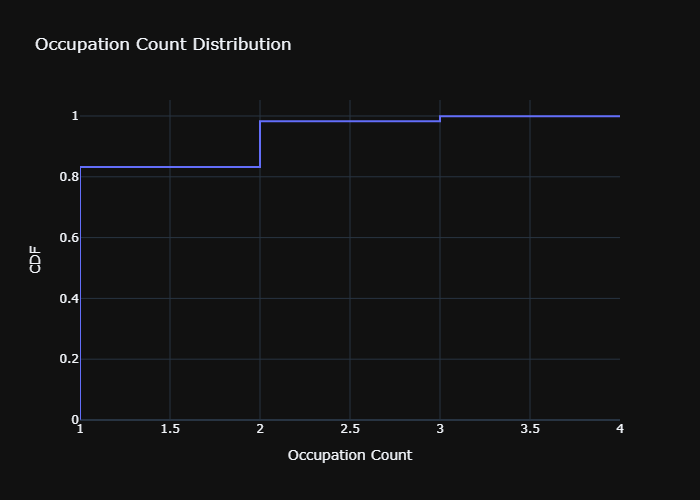

In [12]:
# Occupation count distribution
occupations_count = account_df.profissao.value_counts().sort_values(ascending=False)
fig = px.ecdf(occupations_count, x=occupations_count.values, title="Occupation Count Distribution",)
fig.update_layout(hovermode="x unified", xaxis_title="Occupation Count", yaxis_title="CDF")
fig.show()

#### sexo

This column is quite evenly distributed.

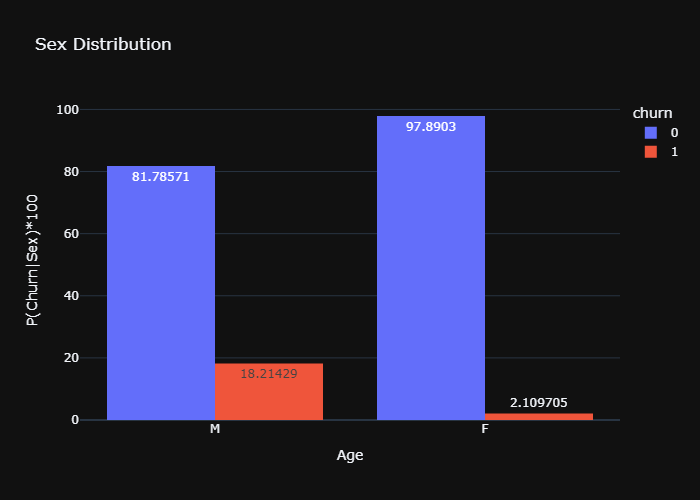

In [13]:
fig = px.histogram(account_df, x="sexo", title="Sex Distribution", text_auto=True, color="churn", barmode="group", barnorm="percent")
fig.update_layout(hovermode="x unified", xaxis_title="Age", yaxis_title="P(Churn|Sex)*100")
fig.show()

Regarding the probability of an associate to churn, given that it is a male:

In [14]:
p_churn_male = account_df.query('sexo == "M"').churn.mean()
p_churn_female = account_df.query('sexo == "F"').churn.mean()

print(f"The probability of churn given that the associate is a male is {p_churn_male/p_churn_female:.3f} times higher if it was a female")

The probability of churn given that the associate is a male is 8.634 times higher if it was a female


To simplify the analysis, I will create the is_male column as it is easier to associate with numerical features.

In [15]:
account_df["is_male"] = (account_df.sexo == "M").astype(int)

#### regiao_residencia

Southeast is the most common region of residence, which is not really surprising Brazil.

In [16]:
account_df.regiao_residencia.value_counts()

regiao_residencia
Sudeste         360
Sul             307
Centro-Oeste    173
Norte           107
Nordeste         87
Name: count, dtype: int64

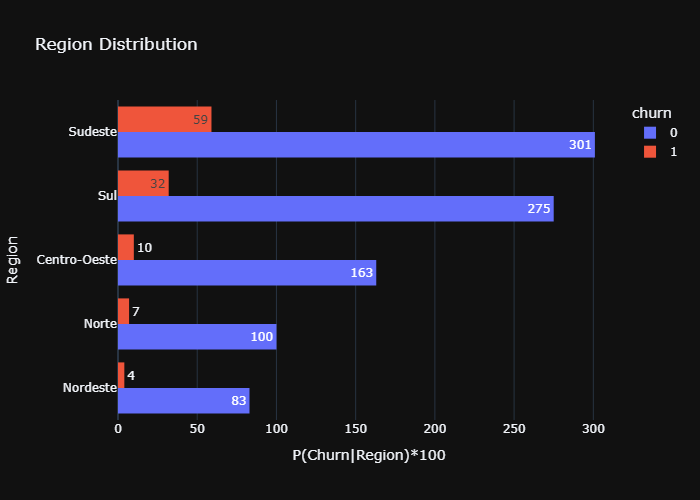

In [17]:
fig = px.histogram(account_df, y="regiao_residencia", title="Region Distribution", color="churn", text_auto=True, barmode="group",)
fig.update_layout(hovermode="y unified", xaxis_title="P(Churn|Region)*100", yaxis_title="Region", yaxis_categoryorder="total ascending")
fig.show()

Considering the probability of an associate to churn, it is also higher in the Southeast region of Brazil.

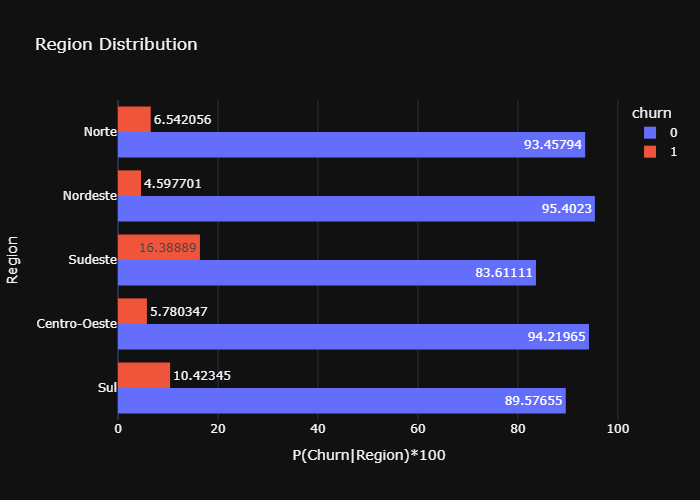

In [18]:
fig = px.histogram(account_df, y="regiao_residencia", title="Region Distribution", color="churn", text_auto=True, barmode="group", barnorm="percent")
fig.update_layout(hovermode="y unified", xaxis_title="P(Churn|Region)*100", yaxis_title="Region",)
fig.show()

#### risco

The risk information is a bit bugged, maybe from the extraction process. Easy to fix. I will also use this information to create an ordinal feature.

In [19]:
account_df.risco.value_counts()

risco
Baixo        485
Médio        370
Alto         119
Altíssimo     34
Altissimo     26
Name: count, dtype: int64

In [20]:
account_df["risk_ordinal"] = account_df.risco.map({
    "Baixo": 0,
    "Médio": 1,
    "Alto": 2,
    "Altíssimo": 3,
    "Altissimo": 3
    })

Looking at the probabilties of churn given the risk, risk levels Alto and Altíssimo are far more likely to churn.

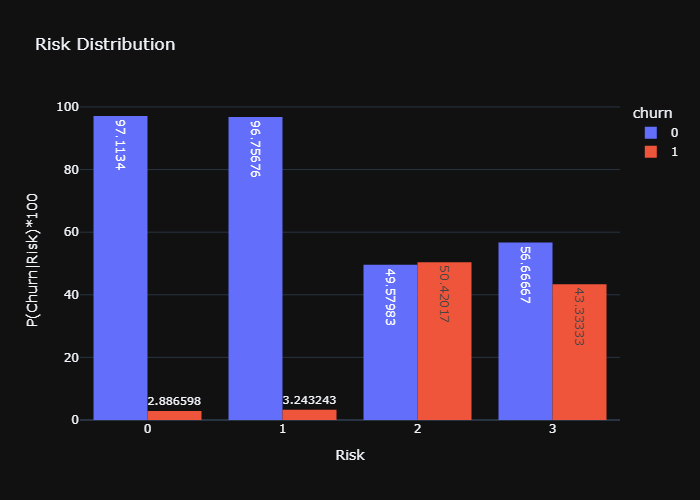

In [21]:
fig = px.histogram(account_df, x="risk_ordinal", title="Risk Distribution", color="churn", text_auto=True, barmode="group", barnorm="percent")
fig.update_layout(hovermode="x unified", xaxis_title="Risk", yaxis_title="P(Churn|Risk)*100")
fig.show()


In [22]:
# P(Churn|Risk=0or1)
p_churn_low_risk = account_df.query('risk_ordinal < 2').churn.mean()
# P(Churn|Risk=2or3)
p_churn_high_risk = account_df.query('risk_ordinal >= 2').churn.mean()

# P(Churn|Risk=2or3) / P(Churn|Risk=0or1)
print(f"The probability of churn given that the associate is in a high risk category is {p_churn_high_risk/p_churn_low_risk:.3f} times higher if it was in a low risk category")

The probability of churn given that the associate is in a high risk category is 15.799 times higher if it was in a low risk category


#### associado_desde

Account creation is going steadily over time. There are some spikes, but no visually relevant change in trend.

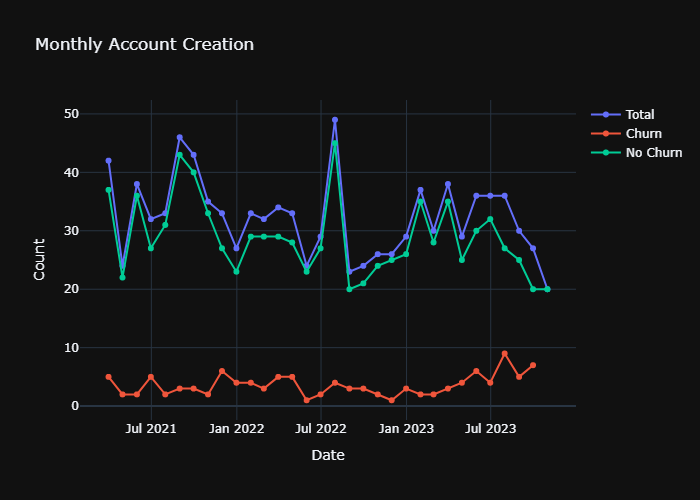

In [23]:
monthly_account_df = account_df.resample("ME", on="associado_desde").size()
monthly_no_churn_df = account_df.query('churn == 0').resample("ME", on="associado_desde").size()
monthly_churn_df = account_df.query('churn == 1').resample("ME", on="associado_desde").size()
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_account_df.index, y=monthly_account_df.values, mode='lines+markers+text', name="Total"))
fig.add_trace(go.Scatter(x=monthly_churn_df.index, y=monthly_churn_df.values, mode='lines+markers+text', name="Churn"))
fig.add_trace(go.Scatter(x=monthly_no_churn_df.index, y=monthly_no_churn_df.values, mode='lines+markers+text', name="No Churn"))
fig.update_layout(title="Monthly Account Creation", xaxis_title="Date", yaxis_title="Count", hovermode="x unified")
fig.show()

Since the problem states that the target is the associate churning in dec/2023, I think it is ok to use this as a variable to help the model. Lets see if it is relevant:

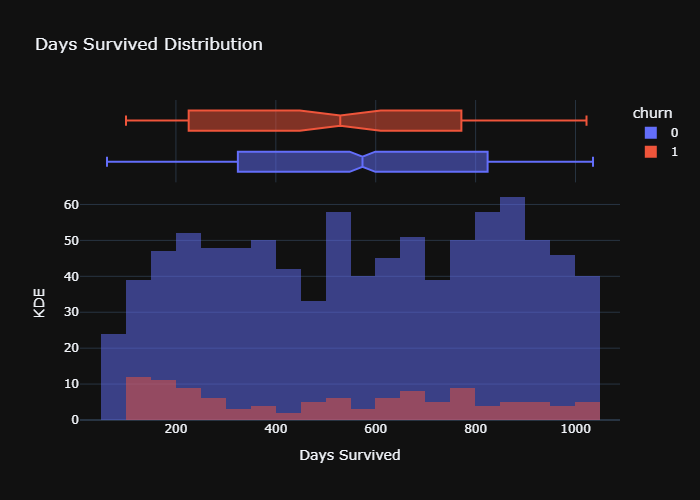

In [24]:
account_df["days_survived"] = (pd.Timestamp("2023-12-31") - account_df.associado_desde).dt.days

fig = px.histogram(account_df, x="days_survived", title="Days Survived Distribution", color="churn", marginal="box", barmode="overlay",)
fig.update_layout(hovermode="x unified", xaxis_title="Days Survived", yaxis_title="KDE")
fig.show()

There isn't much of a relevant difference between distributions. When modeling, maybe it'll prove to be useful. Let's wait and see.

---

### CC Transactions Data

Before delving into transaction data I will separate the actual features I will use in a new dataframe so I can easily merge them later.

In [25]:
associate_df = account_df[['idade', 'regiao_residencia', 'risk_ordinal', 'days_survived', 'churn', 'is_male']].copy()
associate_df = associate_df.rename(columns={'risk_ordinal': 'risk', 'regiao_residencia': 'region', 'idade': 'age', })
associate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 99951605 to 81484854
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1034 non-null   int64 
 1   region         1034 non-null   object
 2   risk           1034 non-null   int64 
 3   days_survived  1034 non-null   int64 
 4   churn          1034 non-null   int64 
 5   is_male        1034 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 88.8+ KB


Now loading the new data:

In [26]:
transactions_df = pd.read_csv('../data/transacional.csv', sep=';', parse_dates=['data'], date_format='%d/%m/%Y', dtype={"id_associado": str, "id_transacao": str})
transactions_df = transactions_df.sort_values('data')
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15819 entries, 12172 to 5435
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_transacao          15819 non-null  object        
 1   id_associado          15819 non-null  object        
 2   data                  15819 non-null  datetime64[ns]
 3   tipo_estabelecimento  15819 non-null  object        
 4   valor                 15819 non-null  int64         
 5   online_presencial     15819 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 865.1+ KB


In [27]:
transactions_df.head()

,id_transacao,id_associado,data,tipo_estabelecimento,valor,online_presencial
12172,71409,81483996,2023-06-01,FABRICACAO DE CONSERVAS DE FRUTAS,415,Presencial
10047,69264,99767318,2023-06-01,COMERCIO ATACADISTA DE OUTROS PRODUTOS QUIMICO...,49,Online
8126,67361,99951943,2023-06-01,FABRICACAO DE PRODUTOS QUIMICOS ORGANICOS NAO ...,173,Online
14660,151184,99766918,2023-06-01,FABRICACAO DE APARELHOS E UTENSILIOS PARA CORR...,209,Online
14647,150963,99767231,2023-06-01,"MANUTENCAO E REPARACAO DE MAQUINAS, APARELHOS ...",28,Presencial


In [28]:
print(f"The dataset has {transactions_df.shape[0]} rows and {transactions_df.id_transacao.nunique()} unique transactions.")

The dataset has 15819 rows and 11433 unique transactions.


Looking below, it looks like some associates have a few transactions that are not unique between themselves. It does not even look like it is an error in just a column. To be safe, I will drop all these lines, since I don't know what caused these id duplication.

In [29]:
transactions_df.loc[transactions_df.duplicated(subset=["id_associado", "id_transacao"], keep=False)].sort_values(["id_associado", "id_transacao"])

,id_transacao,id_associado,data,tipo_estabelecimento,valor,online_presencial
12217,71447,81483006,2023-09-05,FABRICACAO DE RESINAS TERMOFIXAS,76,Online
12216,71447,81483006,2023-09-07,"COMERCIO ATACADISTA DE VIDROS, ESPELHOS E VITRAIS",232,Online
13450,72898,99768277,2023-11-16,"FABRICACAO DE ARMAS DE FOGO, OUTRAS ARMAS E MU...",21,Presencial
13449,72898,99768277,2023-11-26,"PRESERVACAO DE PEIXES, CRUSTACEOS E MOLUSCOS",185,Online
864,57581,99769118,2023-08-28,"COMERCIO ATACADISTA DE SEMENTES, FLORES, PLANT...",215,Presencial
865,57581,99769118,2023-10-09,CULTIVOS E SEMICULTIVOS DA AQUICULTURA EM AGUA...,135,Online
5801,65032,99950684,2023-07-19,"FABRICACAO DE COSMETICOS, PRODUTOS DE PERFUMAR...",119,Presencial
5802,65032,99950684,2023-10-06,"COMERCIO ATACADISTA DE LUSTRES, LUMINARIAS E A...",99,Online
5800,65032,99950684,2023-12-20,"FABRICACAO DE TRANSFORMADORES, INDUTORES, CONV...",321,Online
1028,57947,99951146,2023-11-30,FABRICACAO DE VIDRO PLANO E DE SEGURANCA,273,Online


In [30]:
transactions_df = transactions_df.drop_duplicates(subset=["id_associado", "id_transacao"], keep=False)

#### Value

Just visualizing the values at first to get a grasp at the distribution. These are not particulaly high valued transactions, but for sure they are concentrated under R$600.

In [31]:
transactions_df.valor.describe()

count    15808.000000
mean       222.824456
std        758.090302
min          1.000000
25%         57.000000
50%        132.000000
75%        248.000000
max      15402.000000
Name: valor, dtype: float64

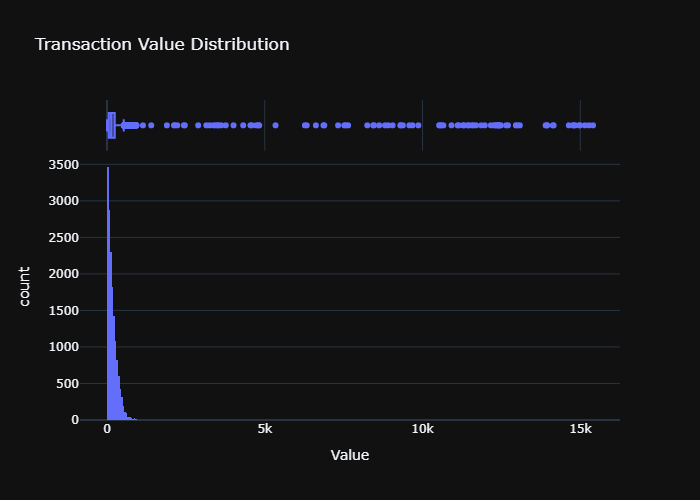

In [32]:
fig = px.histogram(transactions_df, x="valor", title="Transaction Value Distribution", marginal="box")
fig.update_layout(hovermode="x unified", xaxis_title="Value")
fig.show()

First of all, I can calculate how many transactions an associate made. And, to no real surprise, lower total transactions are a great sign that a customer is going to leave. The maximum count of transactions that a churning customer has on this sample database is 11, which is a really low number of transactions. The reason why is not clear just from this. Maybe the total value of transactions can shed a light on this.

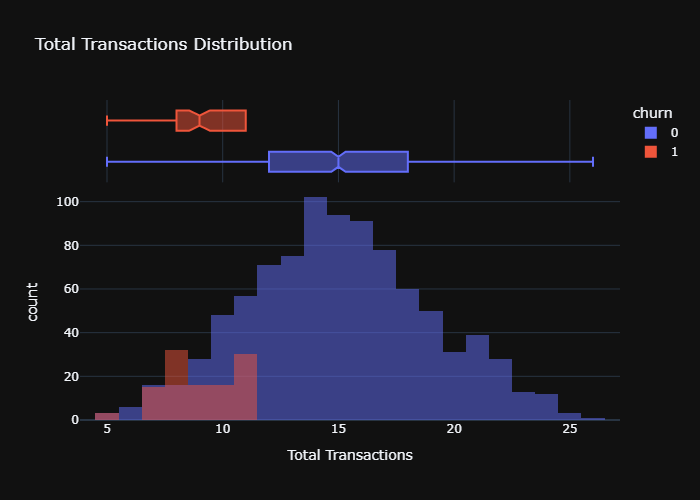

In [33]:
associate_df['total_trx'] = transactions_df.groupby('id_associado').size()

fig = px.histogram(associate_df, x="total_trx", title="Total Transactions Distribution", color="churn", marginal="box", barmode="overlay",)
fig.update_layout(hovermode="x unified", xaxis_title="Total Transactions")
fig.show()

The total value is not really that different, but again, churning associates have a lower total.

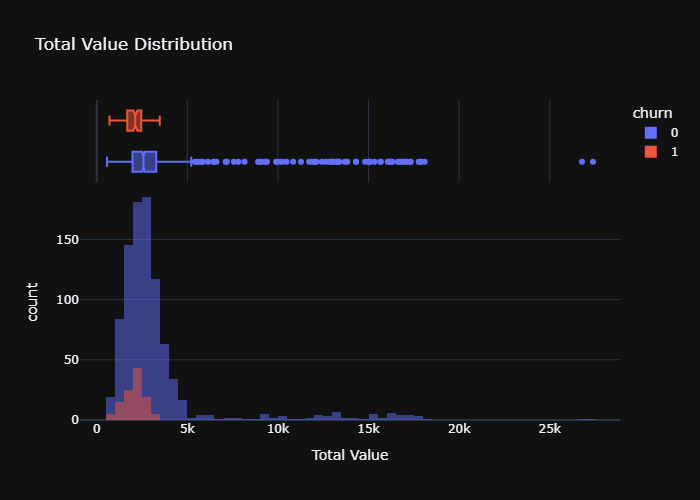

In [34]:
associate_df['total_value'] = transactions_df.groupby('id_associado').valor.sum()

fig = px.histogram(associate_df, x="total_value", title="Total Value Distribution", color="churn", marginal="box", barmode="overlay",)
fig.update_layout(hovermode="x unified", xaxis_title="Total Value")
fig.show()

Curiously, the average value spent with each transaction is higher for churning associates. Maybe they try and use their CCs for few higher values transactions. 

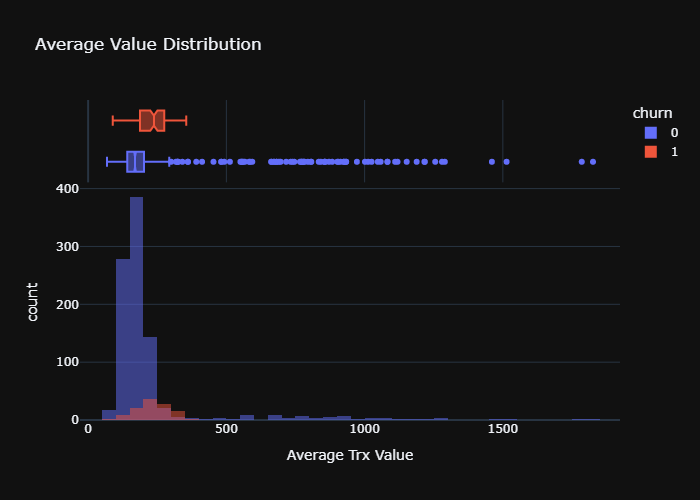

In [35]:
associate_df["avg_trx_value"] = transactions_df.groupby('id_associado').valor.mean()

fig = px.histogram(associate_df, x="avg_trx_value", title="Average Value Distribution", color="churn", marginal="box", barmode="overlay",)
fig.update_layout(hovermode="x unified", xaxis_title="Average Trx Value")
fig.show()

#### Card Present?

The transactions are almost evenly distributed.

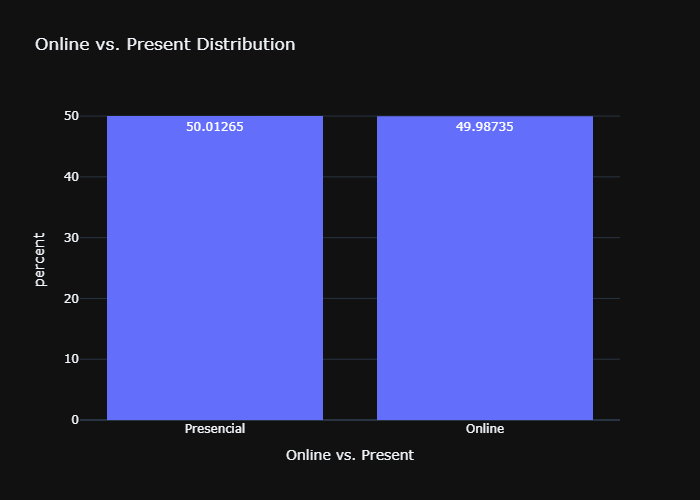

In [36]:
fig = px.histogram(transactions_df, x="online_presencial", title="Online vs. Present Distribution", histnorm="percent", text_auto=True)
fig.update_layout(hovermode="x unified", xaxis_title="Online vs. Present")
fig.show()

To make my analisys easier, I will map this column to a new numeric variable is_cnp.

In [37]:
transactions_df["is_cnp"] = transactions_df.online_presencial.map({
    "Online": 1,
    "Presencial": 0
    })

Now, when counting how many CNP transactions an associate has, lower numbers are more prone to churn, which follows the overall count. So this variable may not be thar useful. Could the proportion be?

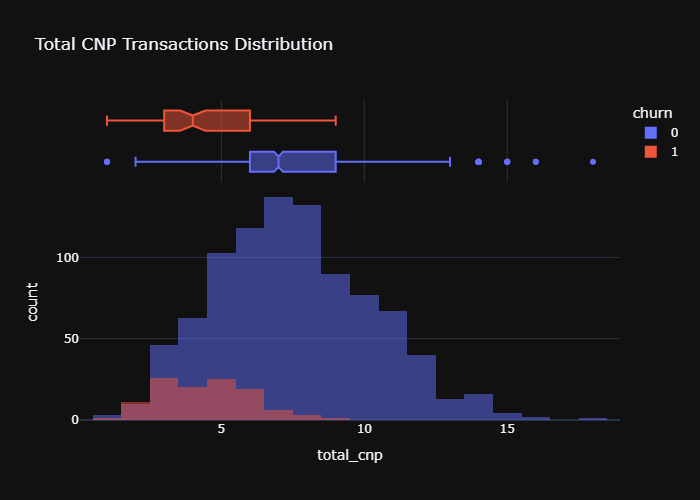

In [38]:
associate_df["total_cnp"] = transactions_df.groupby('id_associado').is_cnp.sum()

fig = px.histogram(associate_df, x="total_cnp", title="Total CNP Transactions Distribution", color="churn", marginal="box", barmode="overlay")
fig.update_layout(hovermode="x unified")
fig.show()


It turns out both count and value proportions are not looking like good predictors.

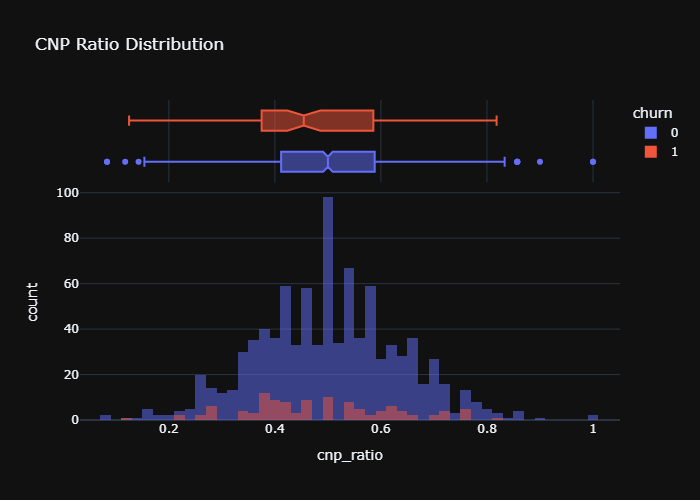

In [39]:
associate_df["cnp_ratio"] = associate_df.total_cnp / associate_df.total_trx

fig = px.histogram(associate_df, x="cnp_ratio", title="CNP Ratio Distribution", color="churn", marginal="box", barmode="overlay")
fig.update_layout(hovermode="x unified")
fig.show()

Let's get rid of these two.

In [40]:
associate_df = associate_df.drop(columns=["cnp_ratio"])

#### Trx date

We can look at a few things using the transaction date that could be the game changer for our analisys, like: count the days in which a transaction has happened, count the transactions on the last X days.

First, let's look at the days transactioned. Isn't it curious that the most days transactioned by the churning associate is the same as the total transactions? 

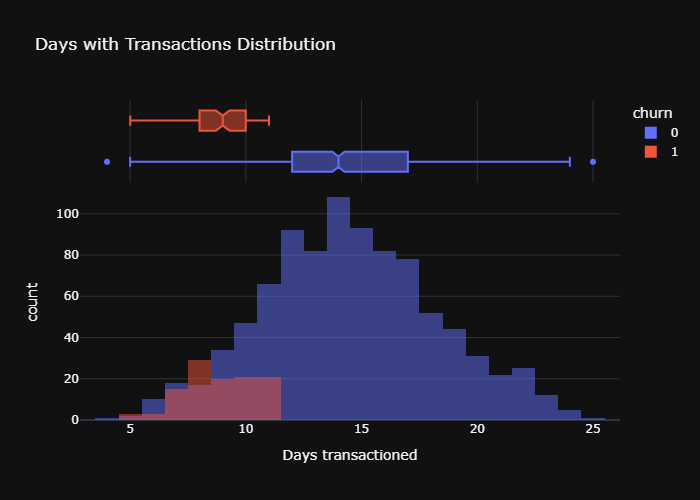

In [41]:
associate_df["days_trx"] = transactions_df.groupby('id_associado')["data"].nunique()

fig = px.histogram(associate_df, x="days_trx", title="Days with Transactions Distribution", color="churn", marginal="box", barmode="overlay")
fig.update_layout(hovermode="x unified", xaxis_title="Days transactioned")
fig.show()

Looking at the transactios per day we see that associates in general have one transaction per day, but in less of a proportion than the churning customer.

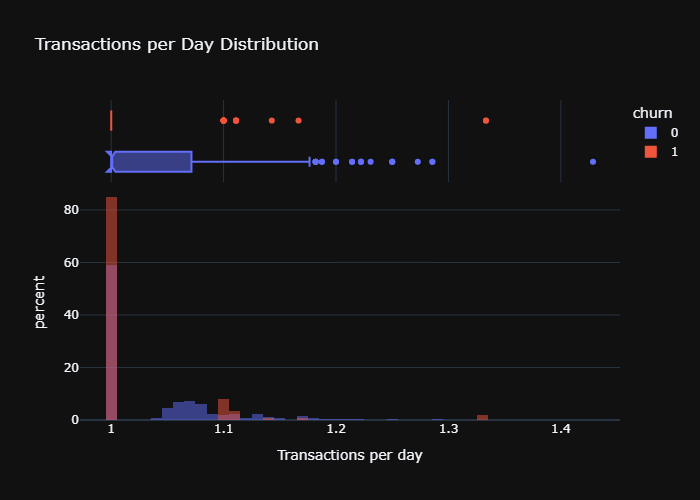

In [42]:
associate_df['trx_per_day'] = transactions_df.groupby('id_associado').size() / associate_df.days_trx
fig = px.histogram(associate_df, x="trx_per_day", title="Transactions per Day Distribution", color="churn", marginal="box", barmode="overlay", histnorm="percent")
fig.update_layout(hovermode="x unified", xaxis_title="Transactions per day")
fig.show()

Looking at the last 30 days from the end of december, there's not much of a separation. This also may represent a lack of temporal coherence as this should be calculated at the time of prediction or at the time of churn or immediately before. So it is best to remove it.

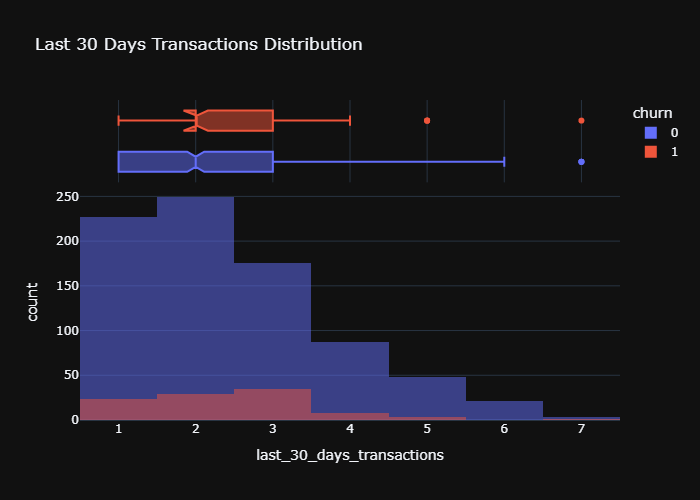

In [43]:
# Count transactions on the last 30 days
associate_df["last_30_days_transactions"] = transactions_df[transactions_df.data >= pd.Timestamp("2023-12-01")].groupby('id_associado').size()

fig = px.histogram(associate_df, x="last_30_days_transactions", title="Last 30 Days Transactions Distribution", color="churn", marginal="box", barmode="overlay")
fig.update_layout(hovermode="x unified")

fig.show()

The values, on the other side could be useful, but its information may be redundant as churning customers have higher valued transactions on average and has fewer days transactioned. Again, the same concern apply here. It may be for the best to remove it.

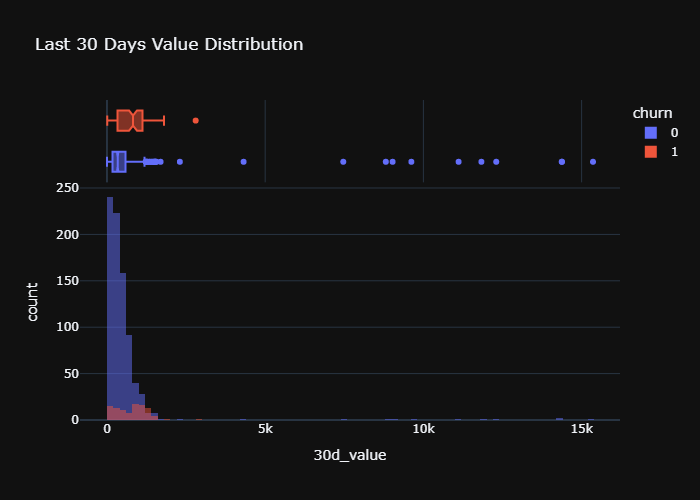

In [44]:
associate_df["30d_value"] = transactions_df[transactions_df.data >= pd.Timestamp("2023-12-01")].groupby('id_associado').valor.sum()

fig = px.histogram(associate_df, x="30d_value", title="Last 30 Days Value Distribution", color="churn", marginal="box", barmode="overlay")
fig.update_layout(hovermode="x unified")

In [45]:
associate_df = associate_df.drop(columns=["last_30_days_transactions", "30d_value"])

#### Establishment Type

The establishment type has many categories and may result in a high dimensional matrix if I try to use it. So, based on previous tests, I will create only one variable from this information: the proportion of transactions in of the most frequent type for an associate.

So, as seen below, this information has potential to differentiate churning associates.

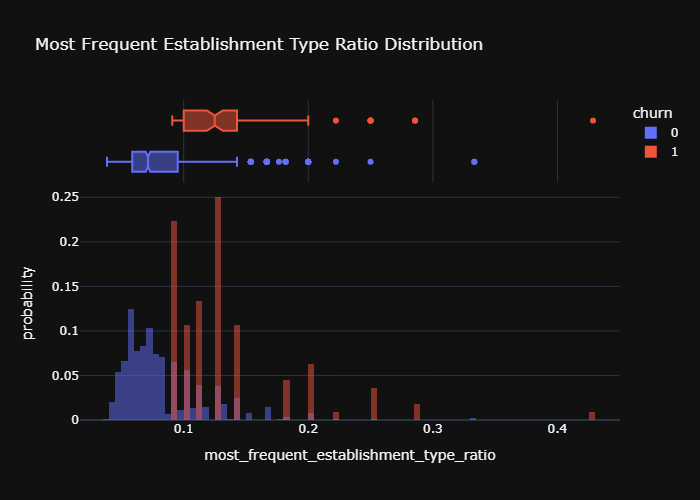

In [46]:
associate_df["most_frequent_establishment_type_ratio"] = transactions_df.groupby('id_associado').tipo_estabelecimento.apply(lambda x: x.value_counts().max() / x.size)

fig = px.histogram(associate_df, x="most_frequent_establishment_type_ratio", title="Most Frequent Establishment Type Ratio Distribution", color="churn", marginal="box", barmode="overlay", histnorm="probability")
fig.update_layout(hovermode="x unified")
fig.show()

## Saving the intermediate data

I will split the work in two notebooks so it doesn't get too heavy or too long. 

In [47]:
associate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 99951605 to 81484854
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     1034 non-null   int64  
 1   region                                  1034 non-null   object 
 2   risk                                    1034 non-null   int64  
 3   days_survived                           1034 non-null   int64  
 4   churn                                   1034 non-null   int64  
 5   is_male                                 1034 non-null   int64  
 6   total_trx                               1034 non-null   int64  
 7   total_value                             1034 non-null   int64  
 8   avg_trx_value                           1034 non-null   float64
 9   total_cnp                               1034 non-null   int64  
 10  days_trx                                1034 non-null 

In [48]:
associate_df.to_parquet('../data/associate_df.parquet')